**TASK 2**

Make a document scanner that scans a document using a camera. The result should be an image scanned with a scanner not a camera.
see the image below. A ID card is on a desk, a camera captures the table and your program should detect ID card and do operations such as rotations and interpolations. The result should be the enlarged ID card on the right side of the image.
Please take a photo of your ID on your desk or table (random angle) and use it for your input for the program.

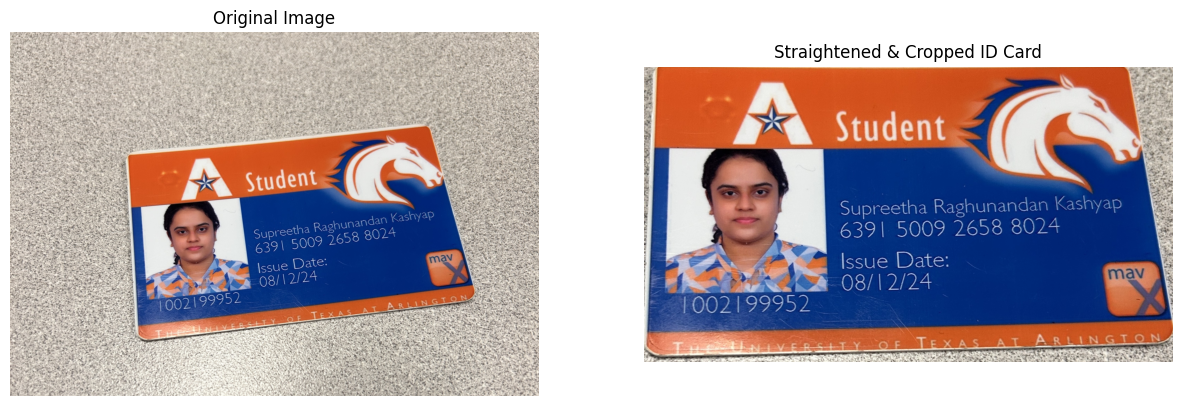

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_process_id_card(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    if img is None:
        print("Error: Could not load image. Please check the file path.")
        return

    # Convert to grayscale for easier processing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary image
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if not contours:
        print("Error: No contours found.")
        return

    # Find the largest contour (likely the ID card)
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box of the largest contour
    rect = cv2.minAreaRect(largest_contour)  # Minimum-area rectangle
    box = cv2.boxPoints(rect)                # Get the 4 corners of the rectangle
    box = np.int32(box)                       # Convert to integer

    # Calculate the angle of rotation and adjust it
    angle = rect[-1]
    width, height = rect[1]

    # If width is less than height, adjust the angle
    if width < height:
        angle = -90 + angle

    # Rotate the image to straighten the ID card
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Rotate the image
    rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

    # Convert to grayscale and threshold again to isolate the ID card
    gray_rotated = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
    _, thresh_rotated = cv2.threshold(gray_rotated, 150, 255, cv2.THRESH_BINARY_INV)
    contours_rotated, _ = cv2.findContours(thresh_rotated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours_rotated:
        print("Error: No contours found in the rotated image.")
        return

    # Get the bounding box of the largest contour in the rotated image
    largest_contour_rotated = max(contours_rotated, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour_rotated)

    # Crop the rotated image to tightly fit the ID card
    cropped_id_card = rotated[y:y+h, x:x+w]

    # Display the original image, straightened, and cropped ID card
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cropped_id_card, cv2.COLOR_BGR2RGB))
    plt.title('Straightened & Cropped ID Card')
    plt.axis('off')

    plt.show()

# Example usage
image_path = r"C:\Users\dell\OneDrive - UT Arlington\Tasks\ID.jpg"  # Replace with your image path
detect_and_process_id_card(image_path)
